In [309]:
from matplotlib import pyplot as plt
import scipy.interpolate as itp
import matplotlib.patches as mpatches
import numpy as np
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True

cc_kids   = np.loadtxt("./current_constraints/two_body_kids_95%_logGamma_vs_logvk.csv",   delimiter=",", dtype=float)
cc_planck = np.loadtxt("./current_constraints/two_body_planck_95%_logGamma_vs_logvk.csv", delimiter=",", dtype=float)

# global configuration paramters

def plot(file, likelihoods, colours, save_path, probe_names, title):
    size = 4
    fontsize_parameter_names = 20
    fontsize_ticks = 18
    fontsize_legend = 20
    fontsize_title = 22
    # ^ LaTeX is also accepted
    labels_x = [r'$f_\mathrm{ddm}^\mathrm{ini}$', r'$\Gamma_\mathrm{ddm}\;\mathrm{[1/Gyr]}$']
    labels_y = [r'$\Gamma_\mathrm{ddm}\;\mathrm{[1/Gyr]}$', r'$\varepsilon$']
    xtick_locations = [
        [-1, 0],
        [-2, np.log10(0.07)],
    ]
    xtick_labels = [
        ["$10^{-1}$", "$10^0$"],
        ["$10^{-2}$", "$7\cdot10^{-2}$"],
    ]
    ytick_locations = [
        [-2, np.log10(0.07)],
        [-3, -2],
    ]
    ytick_labels = [
        ["$10^{-2}$", "$7\cdot10^{-2}$"],
        ["$10^{-3}$", "$10^{-2}$"],
    ]
    # these colours are taken from the seaborn colourblind palette
    alpha = 0.2

    f_scale = np.linspace(-1.3, 0, 100)
    # g_scale = np.linspace(-2.7, -1.13, 100)
    g_scale = np.linspace(-2.8, np.log10(0.07), 100)
    e_scale = np.linspace(-3.5, -1.8, 100)
    xtick_locations_minor = [
        np.concatenate(( np.log10(np.linspace(0.06, 0.1, 5)),   np.log10(np.linspace(0.1, 1, 11)) )),
        np.concatenate(( np.log10(np.linspace(0.002, 0.01, 9)), np.log10(np.linspace(0.01, 0.07, 7)) ))
    ]
    ytick_locations_minor = [
        np.concatenate(( np.log10(np.linspace(0.002, 0.01, 9)), np.log10(np.linspace(0.01, 0.07, 7)) )),
        np.concatenate(( np.log10(np.linspace(0.0004, 0.001, 7)), np.log10(np.linspace(0.001, 0.01, 11)) ))
    ]

    parameters = file['parameters']
    experiments = np.atleast_1d(file['experiments'])
    xs=file['xs'][()]
    ys=file['ys'][()]
    levels=file['lvls'][()]
    extents=file['exts'][()]

    # plotting

    fig, axs = plt.subplots(len(parameters)-1, len(parameters)-1)
    fig.set_figheight(size*(len(parameters)-1))
    fig.set_figwidth (size*(len(parameters)-1))
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    handles = []

    # add current constraints
    # axs[1,1].plot(cc_kids[:,0], np.log10(1/(1+299792.458*10**(-cc_kids[:,1]))), linestyle="dashed", linewidth=2, color="black", zorder=7)
    # handles.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constr.\;(KiDS}\;f=1)$"))
    # planck_colour = "red"
    # axs[1,1].plot(cc_planck[:,0], np.log10(1/(1+299792.458*10**(-cc_planck[:,1]))), linestyle="dashed", linewidth=2, color=planck_colour, zorder=6)
    # handles.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color=planck_colour, lw=2, label="$\mathrm{Current\;constr.}\;(Planck\;f=1)$"))
    # axs[1,1].set_xlim(g_scale[0], g_scale[-1])

    # add current constraint arrows
    cc_gamma = -2
    cc_epsilon = -3
    line_thickness = 0.03
    line_width = 0.14
    arrow_colour = "black"
    # Г-f-plane
    axs[0,0].arrow(-0.15, cc_gamma + line_thickness/2, 0, -1*line_thickness, \
                   length_includes_head=True, head_width=0, head_length=0, width=line_width, zorder=8, color=arrow_colour)
    axs[0,0].arrow(-0.15, cc_gamma + 0.2, 0, -0.15, \
                   length_includes_head=True, head_width=0.08, head_length=0.05, width=0.005, zorder=8, color=arrow_colour)
    # з-f-plane
    axs[1,0].arrow(-0.15, cc_epsilon + line_thickness/2, 0, -1*line_thickness, \
                   length_includes_head=True, head_width=0, head_length=0, width=line_width, zorder=8, color=arrow_colour)
    axs[1,0].arrow(-0.15, cc_epsilon + 0.2, 0, -0.15, \
                   length_includes_head=True, head_width=0.08, head_length=0.05, width=0.005, zorder=8, color=arrow_colour)
    handles.append(mpatches.FancyArrowPatch((0,0), (0,0), arrowstyle="->", \
                                            label=r"$\mathrm{Current\;constraint}\;(f_\mathrm{ddm}^\mathrm{ini}\equiv1)$"))
    class ArrowHandler(mpl.legend_handler.HandlerBase):
        def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
            arrow = mpatches.FancyArrow(5, 6, 30, 0, color=arrow_colour, width=3, length_includes_head=True, head_width=16, head_length=10)
            return [arrow]

    # for k, exp in enumerate(experiments):
    #     for i, name_y in enumerate(parameters):
    #         for j, name_x in enumerate(parameters):
    for k in range(len(experiments)):
        for i in range(len(parameters)-1):
            for j in range(len(parameters)-1):
                if j < i+1:
                    # plot

                    lkl_name = '%s,%s,%s' % (i+1, j, k)
                    x = xs[lkl_name]
                    y = ys[lkl_name]
                    interp = itp.interp2d(y, x, likelihoods[lkl_name])
                    if i == 0 and j == 0:
                        interpd_lkl = interp(f_scale, g_scale)
                        extent = [f_scale[0], f_scale[-1], g_scale[0], g_scale[-1]]
                        # print(lkl_name, extents[lkl_name])
                    elif i == 1 and j == 0:
                        interpd_lkl = interp(f_scale, e_scale)
                        extent = [f_scale[0], f_scale[-1], e_scale[0], e_scale[-1]]
                    elif i == 1 and j == 1:
                        interpd_lkl = interp(g_scale, e_scale)
                        extent = [g_scale[0], g_scale[-1], e_scale[0], e_scale[-1]]
                    axs[i,j].contourf(
                        # likelihoods[lkl_name],
                        interpd_lkl,
                        levels=levels[lkl_name],
                        colors=[colours[k]],
                        alpha=alpha,
                        extent=extent,
                    )
                    axs[i,j].contour(
                        # likelihoods[lkl_name],
                        interpd_lkl,
                        levels=levels[lkl_name],
                        colors=[colours[k]],
                        extent=extent,
                        linewidths=2,
                    )
                    axs[i,j].tick_params(length=8, pad=8)
                    axs[i,j].tick_params(length=4, which="minor")

                    # set ticks
                    axs[i,j].tick_params(direction='in', which="both", right=True, top=True)
                    if i == len(parameters)-2:
                        axs[i,j].set_xticks(xtick_locations[j], xtick_labels[j], fontsize=fontsize_ticks)
                        axs[i,j].set_xticks(xtick_locations_minor[j], ["" for x in xtick_locations_minor[j]], minor=True)
                        axs[i,j].set_xlabel(labels_x[j], fontsize=fontsize_parameter_names)
                    if i < len(parameters)-2:
                        axs[i,j].set_xticks(xtick_locations[j], ["" for x in range(len(xtick_locations[j]))])
                        axs[i,j].set_xticks(xtick_locations_minor[j], ["" for x in xtick_locations_minor[j]], minor=True)
                    if j == 0:
                        axs[i,j].set_yticks(ytick_locations[i], ytick_labels[i], fontsize=fontsize_ticks)
                        axs[i,j].set_yticks(ytick_locations_minor[i], ["" for x in ytick_locations_minor[i]], minor=True)
                        axs[i,j].set_ylabel(labels_y[i], fontsize=fontsize_parameter_names)
                    if j > 0:
                        axs[i,j].set_yticks(ytick_locations[i], ["" for x in range(len(ytick_locations[i]))])
                        axs[i,j].set_yticks(ytick_locations_minor[i], ["" for x in ytick_locations_minor[i]], minor=True)

                else:
                    # hide top right plots
                    axs[i,j].axis("off")
        c1, c2, c3 = colours[k]
        handles.append(mpatches.Patch(facecolor=(c1, c2, c3, alpha), edgecolor=colours[k], label=probe_names[k]))

    axs[0,-1].legend(handles=handles, loc="lower left", fontsize=fontsize_legend, handler_map={mpatches.FancyArrowPatch: ArrowHandler()})
    fig.suptitle(title, fontsize=fontsize_title, y=0.95)

    fig.savefig(save_path, bbox_inches = "tight")

# pess probe comparison

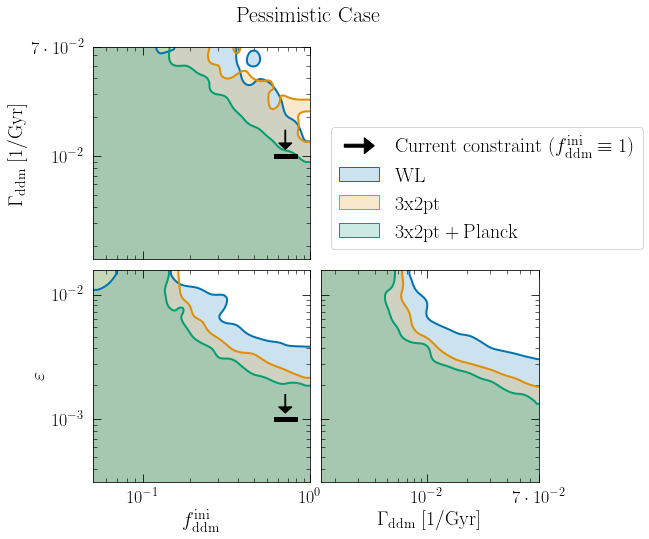

In [310]:
file = np.load("./posteriors/2b/pess.npz", allow_pickle=True)
likelihoods=file['lkls'][()]
colours = [
    (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
    (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), 
    (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)
]
save_path = './2b/pess probe comparison.pdf'
probe_names = ['$\mathrm{WL}$', '$\mathrm{3x2pt}$', r'$\mathrm{3x2pt + Planck}$']
title = "$\mathrm{Pessimistic\; Case}$"
plot(file, likelihoods, colours, save_path, probe_names, title)

# opt probe comparison

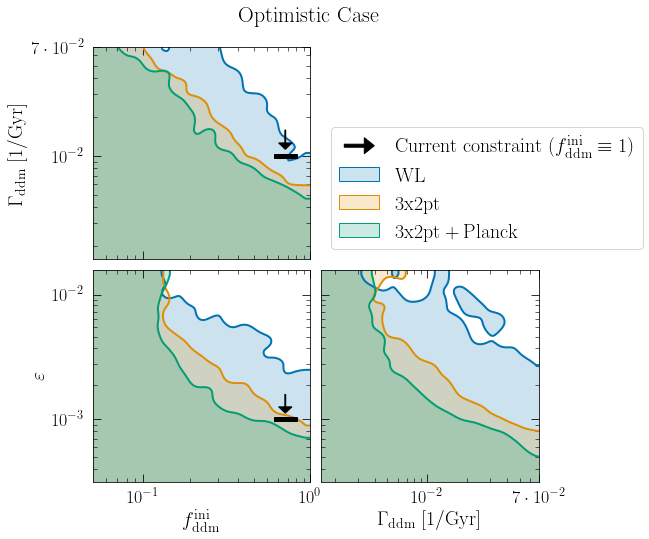

In [311]:
file = np.load("./posteriors/2b/opt.npz", allow_pickle=True)
likelihoods=file['lkls'][()]
colours = [
    (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
    (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), 
    (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)
]
save_path = './2b/opt probe comparison.pdf'
probe_names = ['$\mathrm{WL}$', '$\mathrm{3x2pt}$', r'$\mathrm{3x2pt + Planck}$']
title = "$\mathrm{Optimistic\; Case}$"
plot(file, likelihoods, colours, save_path, probe_names, title)

# pess BF comparison

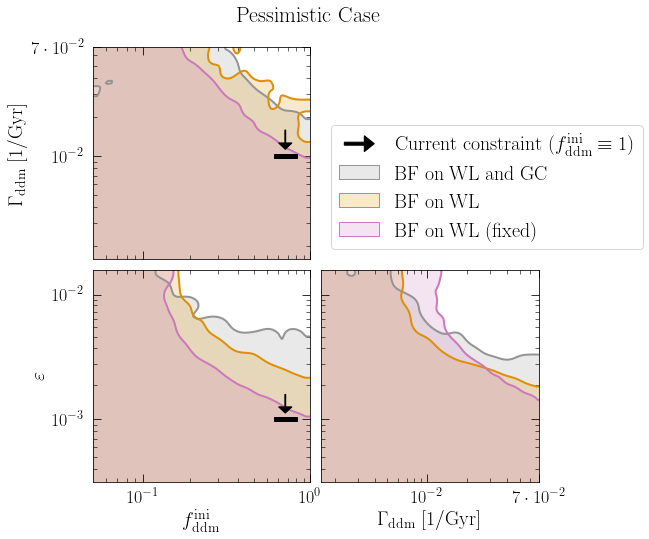

In [312]:
file = np.load("./posteriors/2b/pess_BF_comparison.npz", allow_pickle=True)
likelihoods=file['lkls'][()]
colours = [
        (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
        (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        (0.8, 0.47058823529411764, 0.7372549019607844),
]
save_path = './2b/pess BF comparison.pdf'
probe_names = [r'$\mathrm{BF\;on\;WL\;and\;GC}$', r'$\mathrm{BF\;on\;WL}$', r'$\mathrm{BF\;on\;WL\;(fixed)}$']
title = "$\mathrm{Pessimistic\; Case}$"
plot(file, likelihoods, colours, save_path, probe_names, title)

# opt BF comparison

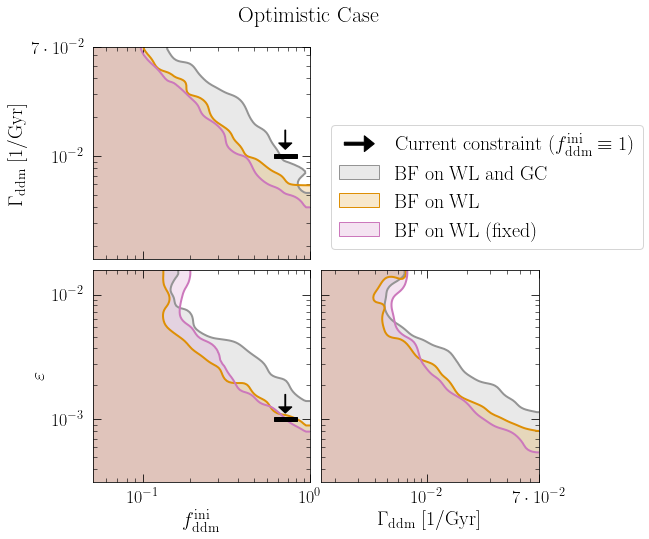

In [313]:
file = np.load("./posteriors/2b/opt_BF_comparison.npz", allow_pickle=True)
likelihoods=file['lkls'][()]
colours = [
        (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
        (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        (0.8, 0.47058823529411764, 0.7372549019607844),
]
save_path = './2b/opt BF comparison.pdf'
probe_names = [r'$\mathrm{BF\;on\;WL\;and\;GC}$', r'$\mathrm{BF\;on\;WL}$', r'$\mathrm{BF\;on\;WL\;(fixed)}$']
title = "$\mathrm{Optimistic\; Case}$"
plot(file, likelihoods, colours, save_path, probe_names, title)